After much struggle to get the data loaded into my Jupyterhub, I am starting over with completely fresh data, a whole new notebook, and expertly named files. Hopefully this works. Going to import Geopandas. 

In [6]:
import geopandas as gpd

Fingers crossed that this next file brings in the data. I renamed all of the files to have underscores rather than spaces. That should help, right? 

In [7]:
district = gpd.read_file('data/lapd_reporting_district.shp')

OMG it worked. Coding can just drain your day. I'm not entirely sure what changed. I got rid of the first dataset that wasn't working. When I uploaded the second dataset, I made sure to rename every file. Maybe the data was bad? (When I opened it previously it said it wasn't supported.) Maybe it was renaming all of the files instead of just the one I needed.  

Anyway- now to actually explore the data. I chose this data to see if it would be helpful for another project I'm likely going to be working on. Trying to understand the relationship between media mentions of riots / looting or peaceful protests in the George Floyd / Breonna Taylor protests last summer. 

Going to start with what does the data look like.

In [8]:
type (district)

geopandas.geodataframe.GeoDataFrame

In [9]:
district.head()

,slug,set,kind,external_i,name,display_na,number,geometry
0,1001-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,1001,1001,1001 LAPD Reporting District,1001,"POLYGON ((-118.55357 34.22048, -118.54608 34.2..."
1,1003-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,1003,1003,1003 LAPD Reporting District,1003,"POLYGON ((-118.54608 34.22059, -118.53608 34.2..."
2,1004-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,1004,1004,1004 LAPD Reporting District,1004,"POLYGON ((-118.53608 34.22073, -118.52735 34.2..."
3,1005-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,1005,1005,1005 LAPD Reporting District,1005,"POLYGON ((-118.52735 34.22087, -118.51862 34.2..."
4,1006-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,1006,1006,1006 LAPD Reporting District,1006,"POLYGON ((-118.51862 34.22101, -118.50987 34.2..."


I wonder why they chose 'slug' as the title for their first column. These last two lines of code showed me that this file contains a dataframe with geographic information, and then showed me what the dataframe looks like. So we have the reporting districts, their names, and the polygons outlining the districts. I'm unsure what external_i is and how that differs from name. 

I would like to see how many districts there are, so I'm going to use the tail function. 

In [10]:
district.tail()

,slug,set,kind,external_i,name,display_na,number,geometry
1130,985-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,985,985,985 LAPD Reporting District,985,"POLYGON ((-118.44871 34.15690, -118.44521 34.1..."
1131,989-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,989,989,989 LAPD Reporting District,989,"POLYGON ((-118.43656 34.15566, -118.43123 34.1..."
1132,991-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,991,991,991 LAPD Reporting District,991,"POLYGON ((-118.46935 34.14847, -118.46802 34.1..."
1133,994-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,994,994,994 LAPD Reporting District,994,"POLYGON ((-118.44658 34.14549, -118.44604 34.1..."
1134,998-lapd-reporting-district,LAPD Reporting Districts,LAPD Reporting District,998,998,998 LAPD Reporting District,998,"POLYGON ((-118.42249 34.14920, -118.42249 34.1..."


Oh, so it seems like there's a lot. But they don't seem to be named with consecutive numbers. So perhaps the tail function isn't best suited to find how many. Probably a count function. 

In [11]:
district.count()

slug          1135
set           1135
kind          1135
external_i    1135
name          1135
display_na    1135
number        1135
geometry      1135
dtype: int64

As an aside: I'm trying to figure out how to use shortcuts for changing to markdown cell. Command + M completely minimizes the file. 

Ok, so esc > m will give you the markdown on a mac. And the esc > y for a code cell. 

What is the difference between .count and .value_counts? 

In [12]:
#sends an error. 
district.value_counts()

AttributeError: 'GeoDataFrame' object has no attribute 'value_counts'

.value_counts() sends an error. It's listed as one of the commands to specifically try in the assignment, so perhaps I need to try it after I plot the data? 

Moving along. Going to see what the shape of the dataframe is. 

In [13]:
district.shape

(1135, 8)

The shape command doesn't need the parenthesis after. The shape basically shows what I was able to find through the .head and .count.

Going to find the info for the dataframe. 

In [14]:
district.info

<bound method DataFrame.info of                               slug                       set  \
0     1001-lapd-reporting-district  LAPD Reporting Districts   
1     1003-lapd-reporting-district  LAPD Reporting Districts   
2     1004-lapd-reporting-district  LAPD Reporting Districts   
3     1005-lapd-reporting-district  LAPD Reporting Districts   
4     1006-lapd-reporting-district  LAPD Reporting Districts   
...                            ...                       ...   
1130   985-lapd-reporting-district  LAPD Reporting Districts   
1131   989-lapd-reporting-district  LAPD Reporting Districts   
1132   991-lapd-reporting-district  LAPD Reporting Districts   
1133   994-lapd-reporting-district  LAPD Reporting Districts   
1134   998-lapd-reporting-district  LAPD Reporting Districts   

                         kind external_i  name                    display_na  \
0     LAPD Reporting District       1001  1001  1001 LAPD Reporting District   
1     LAPD Reporting District       100

I would imagine that each of the names are unique, but let's check. Using the value_counts correctly here. 

In [15]:
district['name'].value_counts()

826     1
979     1
1533    1
1605    1
1091    1
       ..
626     1
2071    1
1101    1
2014    1
723     1
Name: name, Length: 1135, dtype: int64

I've been trying to plot this (plotting this data is totally unnecessary, but plotting would be helpful for other data.)  but I don't think I can plot from a dataframe? Not sure. But going to change the columns into a list like in class. 

In [16]:
name_count= district['name'].value_counts()

In [17]:
name_count

826     1
979     1
1533    1
1605    1
1091    1
       ..
626     1
2071    1
1101    1
2014    1
723     1
Name: name, Length: 1135, dtype: int64

Had to set up a variable for the value counts so that then i can plot it. 

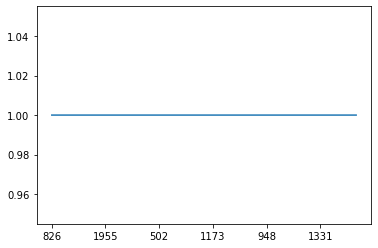

In [18]:
name_count.plot()

Yes, as expected the plot was just a straight line because the its the name of the districts. 

Want to find the districts named 1135. 

In [24]:
district.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   slug        1135 non-null   object  
 1   set         1135 non-null   object  
 2   kind        1135 non-null   object  
 3   external_i  1135 non-null   object  
 4   name        1135 non-null   object  
 5   display_na  1135 non-null   object  
 6   number      1135 non-null   object  
 7   geometry    1135 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 71.1+ KB


In [34]:
district['name'] = district['name'].astype("|S")

I needed to change my data to a string so I can query. I tried this^ but am still getting object when I run the info() again. 

In [39]:
district[district.name == "1135"]

,slug,set,kind,external_i,name,display_na,number,geometry
